In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
data = pd.read_csv('/content/drive/MyDrive/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print(data.shape)
data.head()

(5000, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


No null values, complete dataset.

In [64]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Mean order_amount = 3145.128 Max order_amount = 704000.


As observed in the table above, max order_amount is 704000 which is an outlier that causes the mean value to be large.( Also depicted through large standard deviation )

In [65]:
price_per_shoe = data['order_amount']/data['total_items']
price_per_shoe.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
dtype: float64

In [66]:
price_per_shoe.median()

153.0

So, most shoes are around $153.0

## Exploratory Data Analysis

> Find possible outliers and check data structure.



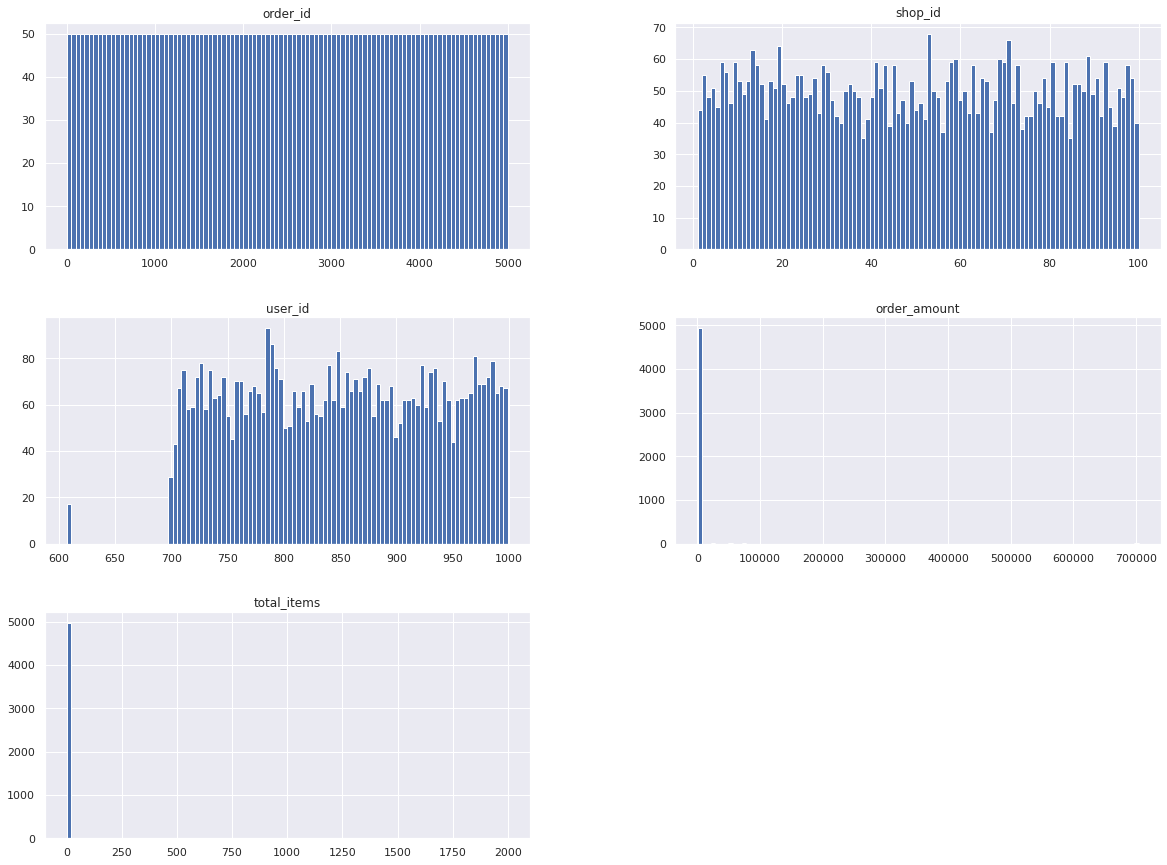

In [67]:
data.hist(bins=100, figsize=(20,15))
plt.show()

So there are outliers in order_amount and total_items (1 prominent bar while the x-axis range is large).

Inspect total_items column

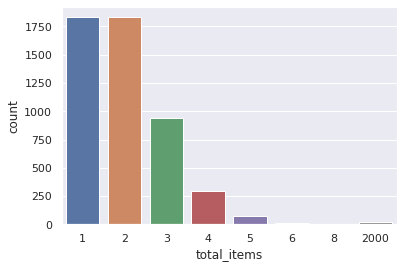

In [68]:
sns.countplot(x='total_items', data=data)

Acc to plot, most orders (placed at a single moment) are below 8.
So, 2000 orders of shoes at a moment seems clear outlier.

Inspect order_amount column

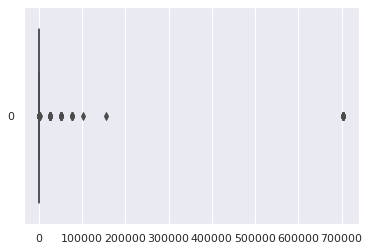

In [69]:
sns.boxplot( data=data['order_amount'],orient = "h")

Since the data is so vast, let's inspect order_amount above 1000 for sneaker

In [70]:
d1 = data[data['order_amount'] >1000]
d1.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35


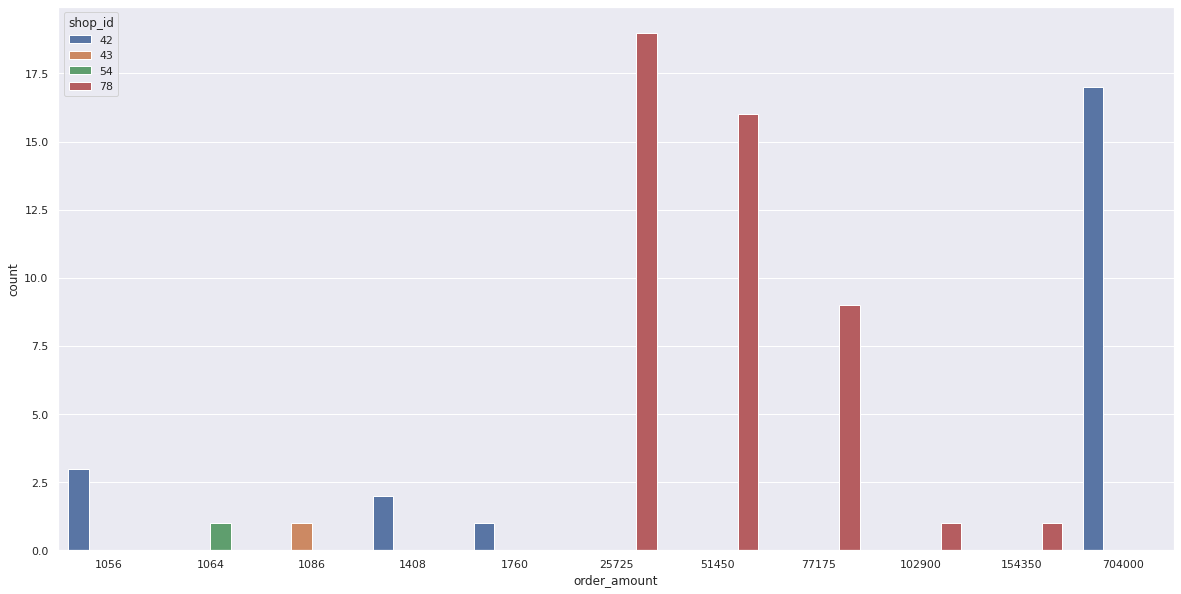

In [71]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x=d1['order_amount'],hue=d1['shop_id'] )

## Shop_id 42 and 78 have highest order_amount and lead to skewness in data that causes mean value to go high.

In [72]:
max_order_amount = data[data['order_amount'] == 704000]
print(max_order_amount.shape)
max_order_amount

(17, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


### So **user_id 607** has bought **2000 total_items 17 times** from **shop_id 42**, each having **order_amount 704000**.
One pair of sneakers are for 352. Order_amount is high due to high no. of items sold.

In [73]:
data[data['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


### In case of shop_id 78 , one pair of sneaker are for 25725.0
Order_amount is high due to expensive sneakers in this case.

In [74]:
# drop rows with order_amount 704000
data = data.drop(max_order_amount.index)

In [75]:
# get index of these rows belonging to shop_id 78
i = data[data.shop_id == 78].index
data = data.drop(i)

In [76]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


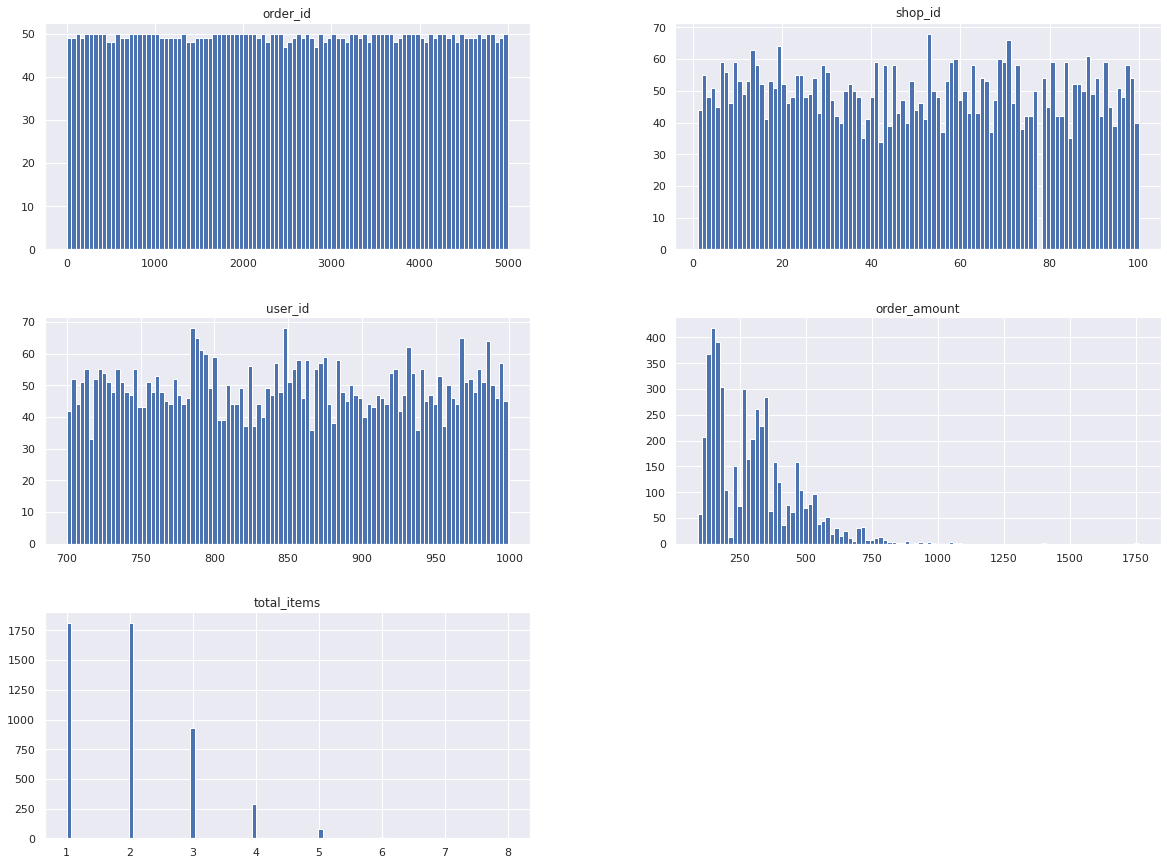

In [77]:
data.hist(bins=100, figsize=(20,15))
plt.show()

Even after removing extreme values, the graph for order_amount looks skewed.
In such cases, median provides a better estimate than mean since it is less affected by outliers and skewed data.

In [78]:
data['order_amount'].mean()

302.58051448247926

In [79]:
data['order_amount'].median()

284.0

In [80]:
price_per_shoe = data['order_amount']/data['total_items']
price_per_shoe.describe()

count    4937.000000
mean      151.788536
std        29.034215
min        90.000000
25%       132.000000
50%       153.000000
75%       166.000000
max       352.000000
dtype: float64

Mean of price_per_shoe falls to $151.78 after removing outliers.

In [81]:
price_per_shoe.median()

153.0